In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read data

In [5]:
train = pd.read_csv("../data/raw/mower_market_snapshot.csv", sep=";")
test = pd.read_csv("../data/raw/submission_set.csv", sep=";")

# Show first rows

In [6]:
print("train size:", train.shape, "! test size:", test.shape)

train size: (1399, 11) ! test size: (600, 9)


In [7]:
train

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
0,10.492623,0.042528,18377,633.766584,828.802103,195.03551928211797,auto-portee,Low,3ans,0.006360,0.650648
1,20.273730,0.037896,19363,731.576817,882.894916,151.31809934886763,auto-portee,Low,3 ans.,0.006840,0.699792
2,20.190457,0.039111,19641,741.218202,919.355522,178.13731921134948,auto-portee,Low,3_ans,0.006179,0.632129
3,27.220131,0.041303,18728,654.255635,817.085097,162.82946157588628,auto-portee,Low,3 anss,0.007925,0.810730
4,16.370911,0.037938,18722,703.094527,844.581465,141.48693796090603,auto-portee,Medium,3ans.,0.007406,0.757614
5,19.548213,0.035428,18268,728.284617,905.297503,177.01288573033196,auto-portee,Medium,3 ans,0.007596,0.777051
6,12.242635,0.035492,18448,757.351286,930.615022,173.26373572791334,auto-portee,Hight,3_ans.,0.007488,0.766056
7,8.676314,0.042066,18943,633.515449,818.075591,184.56014118975136,auto-portee,Low,3 anss,0.005291,0.541318
8,15.264180,0.038804,19640,646.626567,816.774028,170.14746134881673,auto-portee,Low,3_ans.,0.006063,0.620278
9,16.190545,0.034045,19559,628.673360,814.799650,186.1262903279073,auto-portee,Low,3_ans.,0.005700,0.583117


In [19]:
train.price.describe()

count    1330.000000
mean      244.018130
std       246.668906
min        62.855737
25%        73.259116
50%        77.963302
75%       380.436817
max       964.973926
Name: price, dtype: float64

In [25]:
train.quality

0          Low
1          Low
2          Low
3          Low
4       Medium
5       Medium
6        Hight
7          Low
8          Low
9          Low
10         Low
11      Medium
12         Low
13         Low
14         Low
15      Medium
16         Low
17      Medium
18       Hight
19         Low
20         Low
21         Low
22         Low
23      Medium
24      Medium
25         Low
26         Low
27       Hight
28         Low
29      Medium
         ...  
1367       Low
1368       Low
1369       Low
1370    Medium
1371       Low
1372       Low
1374       Low
1375     Hight
1376       Low
1377       Low
1378       Low
1379    Medium
1380       Low
1381       Low
1382       Low
1383       Low
1384    Medium
1385    Medium
1386       Low
1387    Medium
1388       Low
1389       Low
1390    Medium
1391     Hight
1392    Medium
1393       Low
1394    Medium
1395       Low
1397       Low
1398       Low
Name: quality, Length: 1330, dtype: object

In [8]:
train.head()

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
0,10.492623,0.042528,18377,633.766584,828.802103,195.03551928211797,auto-portee,Low,3ans,0.006360,0.650648
1,20.273730,0.037896,19363,731.576817,882.894916,151.31809934886763,auto-portee,Low,3 ans.,0.006840,0.699792
2,20.190457,0.039111,19641,741.218202,919.355522,178.13731921134948,auto-portee,Low,3_ans,0.006179,0.632129
3,27.220131,0.041303,18728,654.255635,817.085097,162.82946157588628,auto-portee,Low,3 anss,0.007925,0.810730
4,16.370911,0.037938,18722,703.094527,844.581465,141.48693796090603,auto-portee,Medium,3ans.,0.007406,0.757614


In [9]:
test.head()

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty
0,21.313064,0.037928,20049,613.061762,768.160605,155.098843,auto-portee,Medium,3 ans
1,25.797234,0.038664,19699,701.321608,865.727540,164.405932,auto-portee,Low,3 ans
2,14.314083,0.043118,19704,654.147498,807.374158,153.226660,auto-portee,Low,3 ans
3,29.754390,0.038551,20072,669.083239,866.573954,197.490715,auto-portee,Low,3 ans
4,24.915116,0.038829,20183,675.313221,859.205792,183.892571,auto-portee,Low,3 ans


# Check over each columns

## Warranty looks weird

In [10]:
train.warranty.unique()

array(['3ans', '3 ans.', '3_ans', '3 anss', '3ans.', '3 ans', '3_ans.',
       '3_anss', '3anss', '2 ans', '2 anss', '2anss', '2_ans', '2ans',
       '2_ans.', '2 ans.', '2_anss', '2ans.', '1 an', '1an', '1_an.',
       '1ans', '1an.', '1_ans', '1_an', '1 an.', '1 ans'], dtype=object)

In [11]:
import re

train["warranty"] = train["warranty"].apply(lambda x: re.sub("[^0-9]", "", x))
train["warranty"] = train["warranty"].astype(int)

## Prod_cost should be a float

In [12]:
list(train["prod_cost"].unique())

['195.03551928211797',
 '151.31809934886763',
 '178.13731921134948',
 '162.82946157588628',
 '141.48693796090603',
 '177.01288573033196',
 '173.26373572791334',
 '184.56014118975136',
 '170.14746134881673',
 '186.1262903279073',
 '148.41503918168814',
 '195.81946333014687',
 '170.99957332823436',
 '139.9698450224172',
 '164.85980921486097',
 '208.75289206129202',
 '167.18992276086493',
 '161.26365131854845',
 '184.97391331970988',
 '156.25068438864682',
 '158.91492725312412',
 '185.56823156025672',
 '184.94371512383591',
 '199.8793048937394',
 '161.1003672316781',
 '149.78979724770687',
 '144.6246131371376',
 '148.98982075813146',
 '167.1419253018245',
 '183.50646371242973',
 '162.24738769188284',
 '192.43158866163057',
 '210.98494137927483',
 '157.84556070034944',
 '162.06122034931462',
 '187.72517747975849',
 '154.37302869548267',
 '156.59559325014203',
 '162.35254312665342',
 '166.9972836639568',
 '140.2610402168683',
 '138.32693813663494',
 '206.7959162257041',
 '145.10773620187885

In [13]:
def clean_prod_cost(row):
    try:
        return float(row)
    except ValueError as _:
        return -1.0

In [14]:
train["prod_cost"] = train["prod_cost"].apply(lambda x: clean_prod_cost(x))

### We need to take only row which contains a positiv prod_cost

In [15]:
train = train[train["prod_cost"] > 0]

## Check Id

In [16]:
print("As we can see, id column is useless", len(train.id.unique()), "/", len(train), "rows")

As we can see, id column is useless 1330 / 1330 rows


## Feature engineering

In [24]:
low = train.price.describe()["50%"]
medium = train.price.describe()["75%"]
good = train.price.describe()["max"]

In [26]:
def build_profit(row):
    return (row["price"] - row["prod_cost"]) / row["price"]


def build_quality_price(row):
    if row["price"] >= medium and row["quality"] == "Hight":
        return "Hight"
    if row["price"] >= medium and row["quality"] == "Medium":
        return "Low"
    if row["price"] >= medium and row["quality"] == "Low":
        return "Low"
    
    if row["price"] < medium and row["price"] >= low and row["quality"] == "Hight":
        return "Hight"
    if row["price"] < medium and row["price"] >= low and row["quality"] == "Medium":
        return "Medium"
    if row["price"] < medium and row["price"] >= low and row["quality"] == "Low":
        return "Low"

    if row["price"] < low and row["quality"] == "Hight":
        return "Hight"
    if row["price"] < low and row["quality"] == "Medium":
        return "Hight"
    if row["price"] < low and row["quality"] == "Low":
        return "Medium"  

In [27]:
train["profit"] = train.apply(lambda x: build_profit(x), axis=1)
train["quality_price"] = train.apply(lambda x: build_quality_price(x), axis=1)

## We don't have a lot of possible value for product_type, & quality so, we can just use a one hot encoder

In [29]:
train = pd.concat([train, pd.get_dummies(train["product_type"], prefix="prod_type", drop_first=True)], axis=1)
train = train.drop("product_type", axis=1)
train = pd.concat([train, pd.get_dummies(train["quality"], prefix="quality", drop_first=True)], axis=1)
train = train.drop("quality", axis=1)
train = pd.concat([train, pd.get_dummies(train["quality_price"], prefix="quality_price", drop_first=True)], axis=1)
train = train.drop("quality_price", axis=1)

### Now all columns looks good

In [30]:
train.dtypes

capacity                float64
failure_rate            float64
id                        int64
margin                  float64
price                   float64
prod_cost               float64
warranty                  int32
market_share            float64
attractiveness          float64
profit                  float64
prod_type_electrique      uint8
prod_type_essence         uint8
quality_Low               uint8
quality_Medium            uint8
quality_price_Low         uint8
quality_price_Medium      uint8
dtype: object

In [31]:
train.describe()

,capacity,failure_rate,id,margin,price,prod_cost,warranty,market_share,attractiveness,profit,prod_type_electrique,prod_type_essence,quality_Low,quality_Medium,quality_price_Low,quality_price_Medium
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,47.622208,0.166274,18957.304511,186.133891,244.018130,57.884239,1.498496,0.002141,0.636438,0.800636,0.296992,0.602256,0.696241,0.209023,0.374436,0.442105
std,19.933097,0.073468,404.971241,190.494666,246.668906,60.346610,0.672191,0.001779,0.124263,0.070595,0.457105,0.489616,0.460053,0.406763,0.484159,0.496824
min,0.013884,0.028906,18259.000000,52.943989,62.855737,7.095443,1.000000,0.000564,0.297384,0.619800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.840060,0.095719,18606.250000,62.257830,73.259116,10.779788,1.000000,0.001135,0.548766,0.728305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.370335,0.199655,18956.000000,66.411687,77.963302,12.255099,1.000000,0.001405,0.641078,0.836865,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,61.868304,0.227943,19307.750000,265.447661,380.436817,114.211909,2.000000,0.002448,0.727568,0.853517,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,104.614865,0.302465,19657.000000,790.012898,964.973926,210.984941,3.000000,0.009314,0.952877,0.897748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check device which have a prod_cost > price

In [32]:
print("There are", len(train[train["prod_cost"] >= train["price"]]), "device selling at a loss")

There are 0 device selling at a loss


# Plot the distribution

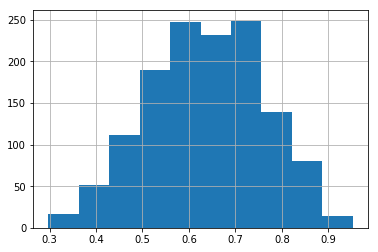

In [33]:
train.attractiveness.hist()

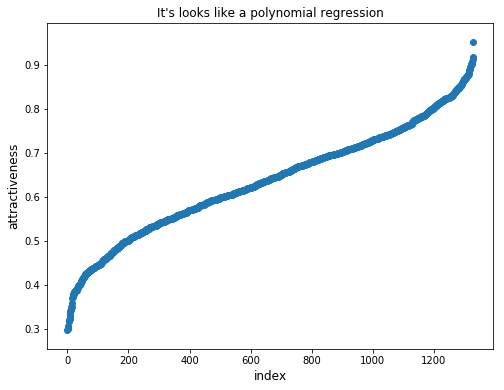

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(range(train.shape[0]), np.sort(train.attractiveness.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('attractiveness', fontsize=12)
plt.title("It's looks like a polynomial regression")
plt.show()

# Show correlation

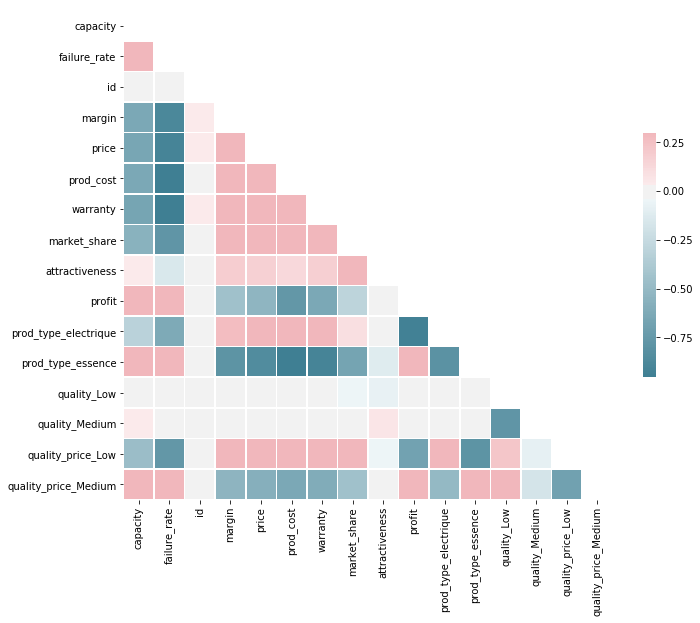

In [35]:
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

# As baseline I'll use a linear regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

import math

In [37]:
X = train.drop(["market_share", "attractiveness", "id"], axis=1)
y = train["attractiveness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Check Multicolinearity (VIF)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("if the VIF value is > 5, there is Multicolinearity")
vif.round(3)

if the VIF value is > 5, there is Multicolinearity


,VIF Factor,features
0,1.774000,capacity
1,15.579000,failure_rate
2,inf,margin
3,inf,price
4,inf,prod_cost
5,2072.903000,warranty
6,37.986000,profit
7,201.977000,prod_type_electrique
8,1754.609000,prod_type_essence
9,8.582000,quality_Low


In [39]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [40]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)

    return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

In [41]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficients":np.transpose(reg.coef_)}).sort_values(by="Coefficients")
print('Coefficients: \n', coefficients)
print("RMSLE: %.3f" % rmsle(y_test, y_pred))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.3f' % r2_score(y_test, y_pred))
print("Mean is", y.mean())
print("Here we are good compare to the mean")

Coefficients: 
     Coefficients               Feature
7      -0.337743  prod_type_electrique
8      -0.292214     prod_type_essence
6      -0.271928                profit
11     -0.165689     quality_price_Low
1      -0.152381          failure_rate
12     -0.051450  quality_price_Medium
3      -0.001810                 price
4      -0.001331             prod_cost
2      -0.000479                margin
0       0.001965              capacity
9       0.052074           quality_Low
10      0.056382        quality_Medium
5       0.922171              warranty
RMSLE: 0.066
RMSE: 0.106
Variance score: 0.308
Mean is 0.6364382104685304
Here we are good compare to the mean


## Plot the predict against real

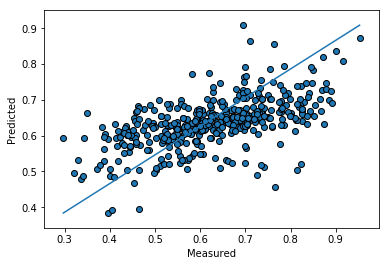

In [42]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

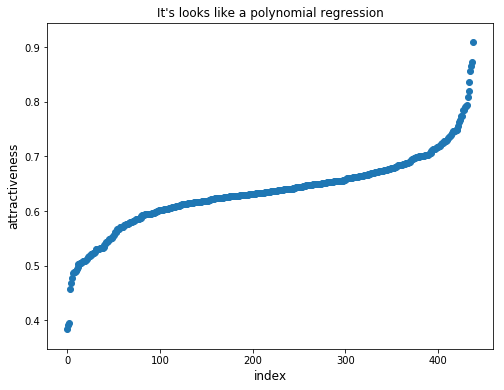

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred))
plt.xlabel('index', fontsize=12)
plt.ylabel('attractiveness', fontsize=12)
plt.title("It's looks like a polynomial regression")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1949DF400>]], dtype=object)

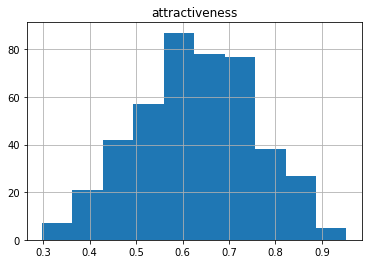

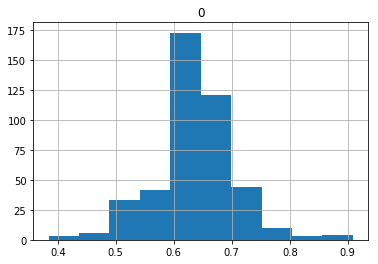

In [44]:
pd.DataFrame(y_test).hist()
pd.DataFrame(y_pred).hist()

# Apply polynomial regression

RMSLE: 0.043
RMSE: 0.069
Variance score: 0.652


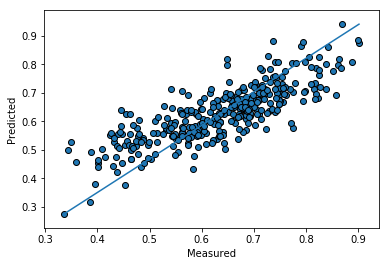

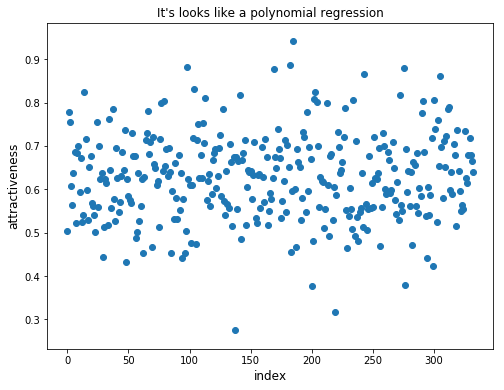

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B198B52320>]], dtype=object)

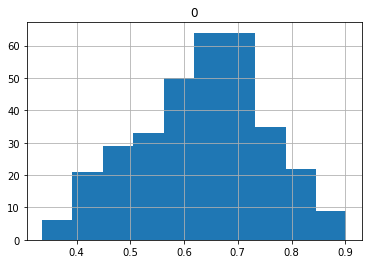

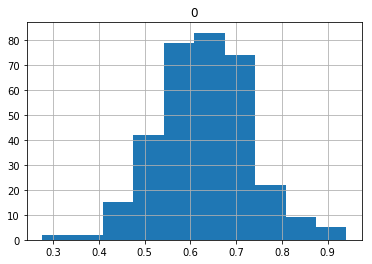

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Apply Some Featuring
poly_reg = PolynomialFeatures(degree=2)

# Transform into numpy object
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)
y_test = np.array(y_test)
y_train = np.array(y_train)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("RMSLE: %.3f" % rmsle(y_test, y_pred))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.3f' % r2_score(y_test, y_pred))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred))
plt.xlabel('index', fontsize=12)
plt.ylabel('attractiveness', fontsize=12)
plt.title("It's looks like a polynomial regression")
plt.show()

pd.DataFrame(y_test).hist()
pd.DataFrame(y_pred).hist()

In [46]:
print("Here we are closer to the real one")

Here we are closer to the real one


# Now we may apply some features selection
## backward for example

# So now, what's next ?
## Find the best model using the insights above

# Unique mdl

In [47]:
train.drop(["id", "market_share"], axis=1).to_csv("train.csv", index=False)

Score on test set: 0.0584905099369
RMSLE: 0.043
RMSE: 0.071
Variance score: 0.666


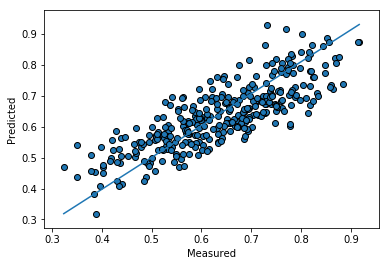

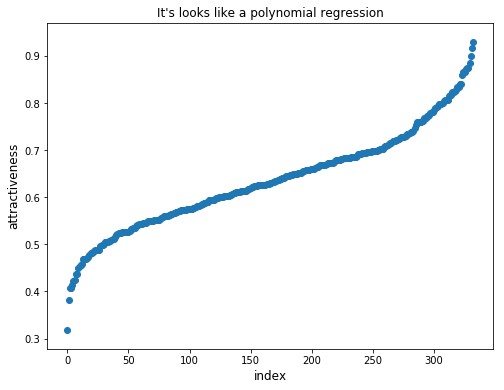

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1949ADEF0>]], dtype=object)

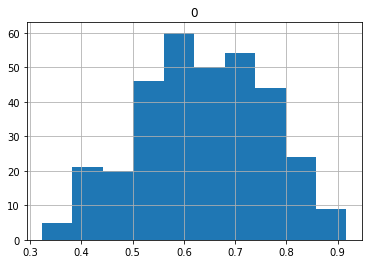

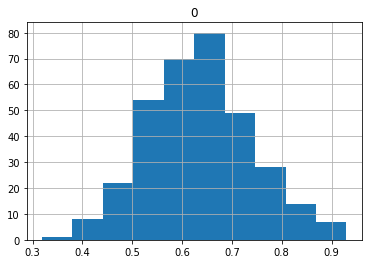

In [51]:
# -*- coding: utf-8 -*-
"""
Created on July 2017

@author: JulienWuthrich
"""
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model.least_angle import LassoLarsCV

from vecstack import stacking

# Read the csv file
data = pd.read_csv("train.csv")
regression = True

# Split dependants and independant variables
y = data[["attractiveness"]]
X = data.drop("attractiveness", axis=1)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Apply Some Featuring
poly_reg = PolynomialFeatures(degree=2)

# Transform into numpy object
x_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)
y_test = np.array(y_test.ix[:,0])
y_train = np.array(y_train.ix[:,0])

# Build model with good params
model = LassoLarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=False, positive=False, precompute='auto', verbose=False)

# Fit the model
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Scoring
if regression:
    print('Score on test set:', mean_absolute_error(y_test, y_pred))
else:
    print('Score on test set:', accuracy_score(y_test, y_pred))

    
print("RMSLE: %.3f" % rmsle(y_test, y_pred))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.3f' % r2_score(y_test, y_pred))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred))
plt.xlabel('index', fontsize=12)
plt.ylabel('attractiveness', fontsize=12)
plt.title("It's looks like a polynomial regression")
plt.show()

pd.DataFrame(y_test).hist()
pd.DataFrame(y_pred).hist()

# Stacked mdl

task:       [regression]
metric:     [rmsle]
mode:       [oof_pred_bag]
n_models:   [3]

model 0:    [ExtraTreesRegressor]
    ----
    MEAN:   [0.04198489] + [0.00129859]
    FULL:   [0.04200681]

model 1:    [GradientBoostingRegressor]
    ----
    MEAN:   [0.04227526] + [0.00100622]
    FULL:   [0.04228864]

model 2:    [ElasticNetCV]
    ----
    MEAN:   [0.07353695] + [0.00213705]
    FULL:   [0.07357074]

Score on test set: 0.0560326024229
RMSLE: 0.043
RMSE: 0.069
Variance score: 0.684


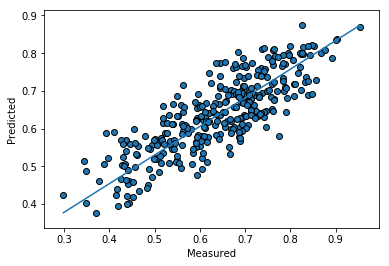

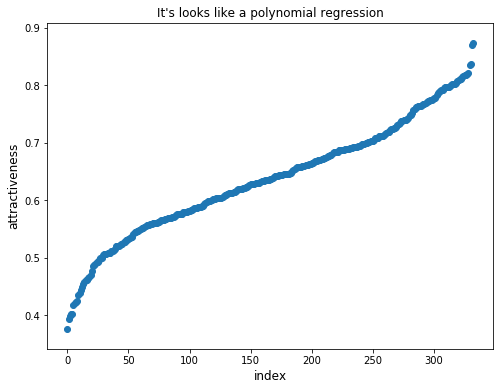

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1988D5B70>]], dtype=object)

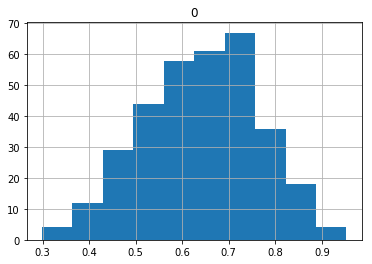

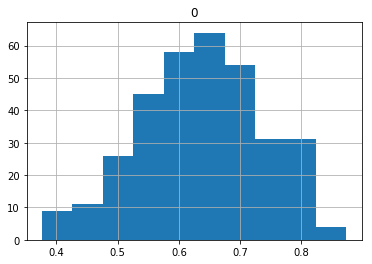

In [50]:
# -*- coding: utf-8 -*-
"""
Created on July 2017

@author: JulienWuthrich
"""
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNetCV, LassoLarsCV, RidgeCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from vecstack import stacking

# Read the csv file
data = pd.read_csv("train.csv")
regression = True
if regression:
    metric = r2_score
else:
    metric = accuracy_score

# Split dependants and independant variables
y = data[["attractiveness"]]
X = data.drop("attractiveness", axis=1)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Apply Some Featuring
poly_reg = PolynomialFeatures(degree=2)

# Transform into numpy object
x_train = poly_reg.fit_transform(X_train)
x_test = poly_reg.fit_transform(X_test)
y_test = np.array(y_test.ix[:,0])
y_train = np.array(y_train.ix[:,0])

# define lmodels
lmodels = [ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features=0.9, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=3, min_samples_split=6,
          min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False), GradientBoostingRegressor(alpha=0.8, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=6, max_features=0.6,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=75, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False), ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.7, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.5, verbose=0)]

# build the stack level 1
S_train, S_test = stacking(
    lmodels, x_train, y_train, x_test,
    regression=regression, metric=rmsle,
    n_folds=3, shuffle=True, verbose=1
)

# build model lvel 2
model = ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.7, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.5, verbose=0)

# Fit the model
model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

# Scoring
if regression:
    print('Score on test set:', mean_absolute_error(y_test, y_pred))
else:
    print('Score on test set:', accuracy_score(y_test, y_pred))

print("RMSLE: %.3f" % rmsle(y_test, y_pred))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.3f' % r2_score(y_test, y_pred))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred))
plt.xlabel('index', fontsize=12)
plt.ylabel('attractiveness', fontsize=12)
plt.title("It's looks like a polynomial regression")
plt.show()

pd.DataFrame(y_test).hist()
pd.DataFrame(y_pred).hist()